In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


The main aim of this notebook is to train CNN models for 250 dimension dataset without the use of theme part.


In [2]:
musicFeatures = pd.read_pickle("./musicFeatures.pkl")  

In [3]:
musicFeatures.shape

(26900, 22)

In [4]:
musicFeatures.head(3)

,id,genre,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,...,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14,themeFeature_0,themeFeature_1,themeFeature_2,themeFeature_3,themeFeature_4
0,124425_0,Folk,"[-367.4169, -240.58614, -193.78488, -180.29262...","[163.79123, 170.1294, 171.51189, 161.30435, 14...","[6.0959854, -5.9718704, -3.6486344, -1.2554941...","[53.194122, 63.06723, 60.13885, 54.763412, 52....","[16.68528, 19.538809, 19.626118, 18.60508, 23....","[-23.51472, -19.84507, -16.962742, -13.548637,...","[6.3363132, -1.276854, -5.610017, -4.050003, -...","[-20.14743, -24.12778, -16.919537, -7.6289234,...",...,"[3.951639, -4.166794, -8.241913, -9.794014, -1...","[5.920375, 9.249519, 8.353765, 11.909894, 14.4...","[-12.381685, -16.062777, -16.373697, -15.77498...","[-3.8526406, -3.5650363, -4.6753526, -5.407305...","[-4.4005404, -11.534243, -12.7789135, -14.0914...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
1,124425_1,Folk,"[-176.67264, -169.07156, -142.83098, -116.0994...","[125.95861, 142.0693, 138.62712, 128.68915, 12...","[-42.819057, -54.282654, -64.97652, -73.68849,...","[68.79902, 82.17572, 71.34984, 73.27362, 84.63...","[15.051884, 15.13154, 15.273981, 14.384039, 15...","[-5.963161, -10.348415, -12.421081, -9.166971,...","[18.740742, 19.350863, 8.707056, 3.6187146, 1....","[-11.269847, -7.254199, 1.2921772, -1.4600475,...",...,"[-5.3846745, -10.779312, -19.985872, -18.81395...","[12.694374, 11.362453, 8.072839, 4.8536325, -0...","[3.3793998, -0.6741159, -0.14108896, -5.083455...","[-19.578459, -20.371014, -11.236882, -7.421087...","[-8.606797, -10.857103, -13.955954, -13.888264...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
2,124425_2,Folk,"[-112.90256, -84.587326, -92.53052, -99.84867,...","[118.598724, 102.67175, 82.80994, 73.35031, 71...","[-33.237568, -38.343197, -34.45424, -24.077305...","[50.234768, 52.99376, 56.314552, 51.52988, 53....","[18.136402, 22.863585, 18.818027, 11.438265, 8...","[-23.589928, -19.38637, -15.253525, -5.8537474...","[11.365215, 6.558339, -1.7250502, -4.8964157, ...","[-8.613762, -10.419959, -4.151663, -1.5471857,...",...,"[-19.939487, -16.535833, -21.92295, -25.605438...","[12.999569, 8.9071, 3.3847241, 5.747637, 2.470...","[-5.4092526, -7.6361217, -13.698164, -13.45112...","[-0.42731082, -2.8598223, -1.4495995, 1.697975...","[-14.1753845, -20.045826, -20.387835, -21.9254...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."


In [5]:
"""
Verifying all shapres and types of data
"""
print(musicFeatures.shape)
print('MFCC Features \n')
print(type(musicFeatures['mfccFeature_0'].iloc[0]))
print(len(musicFeatures['mfccFeature_0'].iloc[0]))
print(type(musicFeatures['mfccFeature_0'].iloc[0][0]))

print('Theme Features \n')
print(type(musicFeatures['themeFeature_0'].iloc[0]))
print(musicFeatures['themeFeature_0'].iloc[0].size)
print(type(musicFeatures['themeFeature_0'].iloc[0][0]))



(26900, 22)
MFCC Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>
Theme Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>


We split the dataset into x and y, y having the predicting columns, we also drop the theme features as it is not needed

In [8]:
#Spliting x and y
y = musicFeatures['genre']
x = musicFeatures.loc[:, musicFeatures.columns != 'genre']
x = x.drop(['id','themeFeature_0','themeFeature_1','themeFeature_2','themeFeature_3','themeFeature_4'],axis =1)

print(x.shape)
print(y.shape)

(26900, 15)
(26900,)


Since we have an np array as in each cell, we need to reshape the data into a 3rd array for the network, we use the following function for the same.

In [9]:
def convertTo3DnpArray(df):
    new = []

    for index, row in df.iterrows():
        temp = []
        for i in row:
            temp.append(i)
        temp = np.stack(temp, axis=1)
        new.append(temp)
    new = np.stack(new, axis=0)
    
    return new

We split the dataset into train,test and valid which is of the ratio 80:10:10. Each model is trained on train and tested on test, once the best model is identified, we do a final validation on valid dataset.

In [10]:
#Train test valid split

x_train_temp, x_valid, y_train_temp, y_valid = train_test_split(x,y,test_size=0.1,random_state=12,stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_train_temp,y_train_temp,test_size=0.1/0.9,random_state=12,stratify=y_train_temp)


x_train = convertTo3DnpArray(x_train)
x_test = convertTo3DnpArray(x_test)
x_valid = convertTo3DnpArray(x_valid)

print('Final Sizes of all datasets')
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('x_valid :',x_valid.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)
print(' \n')

print('Value counts ')
print('y_train :')
print(y_train.value_counts())
print('y_test :')
print(y_test.value_counts())
print('y_valid :')
print(y_valid.value_counts())



Final Sizes of all datasets
x_train : (21520, 250, 15)
x_test : (2690, 250, 15)
x_valid : (2690, 250, 15)
y_train : (21520,)
y_test : (2690,)
y_valid : (2690,)
 

Value counts 
y_train :
Rock            3820
Hip-Hop         3304
Experimental    3228
Folk            3224
Electronic      3192
Pop             2428
Instrumental    2324
Name: genre, dtype: int64
y_test :
Rock            477
Hip-Hop         413
Experimental    404
Folk            403
Electronic      399
Pop             303
Instrumental    291
Name: genre, dtype: int64
y_valid :
Rock            478
Hip-Hop         413
Folk            403
Experimental    403
Electronic      399
Pop             304
Instrumental    290
Name: genre, dtype: int64


We convert the y values into one hot encoded values.

In [11]:


ohe = OneHotEncoder()

y_valid = ohe.fit_transform(y_valid.values.reshape(-1, 1)).toarray()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test  = ohe.fit_transform(y_test .values.reshape(-1, 1)).toarray()

print('Verifying size')
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)


Verifying size
y_train : (21520, 7)
y_test : (2690, 7)
y_valid : (2690, 7)


In [12]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Bidirectional
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The following function is used to plot the graphs for train and loss accuracy.

In [14]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Test loss')
    plt.title('Training and test loss')
    plt.legend()

The first model is a simple 3 set CNN model with the use of maxpooling and batchnormalization.

In [13]:
model1 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(16, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

model1.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 13, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 7, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 124, 7, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 5, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 3, 32)        0         
 2D)                                                             
                                                        

Epoch 1/50
673/673 [==============================] - 28s 41ms/step - loss: 1.5230 - accuracy: 0.4366 - val_loss: 1.5115 - val_accuracy: 0.4316
Epoch 2/50
673/673 [==============================] - 28s 42ms/step - loss: 1.3575 - accuracy: 0.5036 - val_loss: 1.4115 - val_accuracy: 0.4844
Epoch 3/50
673/673 [==============================] - 27s 40ms/step - loss: 1.2831 - accuracy: 0.5331 - val_loss: 1.2725 - val_accuracy: 0.5442
Epoch 4/50
673/673 [==============================] - 24s 35ms/step - loss: 1.2180 - accuracy: 0.5571 - val_loss: 1.2477 - val_accuracy: 0.5383
Epoch 5/50
673/673 [==============================] - 26s 39ms/step - loss: 1.1737 - accuracy: 0.5737 - val_loss: 1.2313 - val_accuracy: 0.5509
Epoch 6/50
673/673 [==============================] - 27s 41ms/step - loss: 1.1309 - accuracy: 0.5895 - val_loss: 1.2633 - val_accuracy: 0.5416
Epoch 7/50
673/673 [==============================] - 27s 40ms/step - loss: 1.0946 - accuracy: 0.6055 - val_loss: 1.2109 - val_accuracy:

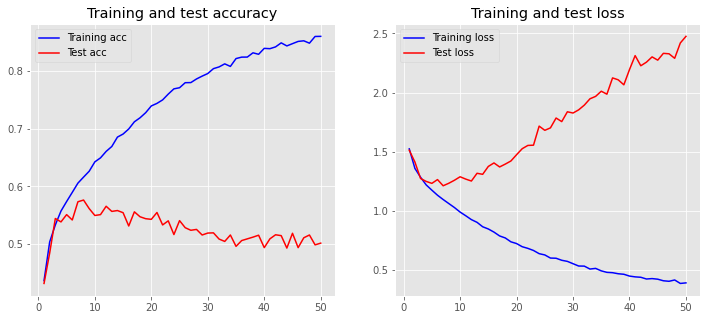

In [14]:
m1 = model1.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=50,batch_size=32)

plot_history(m1)


Model2 is a smaller model, We are trying to check if smaller model can learn better. We also dont use any batch normalization

In [15]:
model2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
    
        tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(7, activation='softmax')
    ])

model2.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 248, 13, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 124, 7, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 123, 6, 32)        4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 3, 32)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 3, 32)         0         
                                                                 
 flatten_1 (Flatten)         (None, 5952)             

Epoch 1/50
1345/1345 [==============================] - 22s 17ms/step - loss: 1.8971 - accuracy: 0.3459 - val_loss: 1.5985 - val_accuracy: 0.3851
Epoch 2/50
1345/1345 [==============================] - 22s 17ms/step - loss: 1.5665 - accuracy: 0.4108 - val_loss: 1.5768 - val_accuracy: 0.3929
Epoch 3/50
1345/1345 [==============================] - 22s 17ms/step - loss: 1.5177 - accuracy: 0.4311 - val_loss: 1.5418 - val_accuracy: 0.4312
Epoch 4/50
1345/1345 [==============================] - 22s 16ms/step - loss: 1.4792 - accuracy: 0.4519 - val_loss: 1.5310 - val_accuracy: 0.4390
Epoch 5/50
1345/1345 [==============================] - 22s 17ms/step - loss: 1.4409 - accuracy: 0.4642 - val_loss: 1.5325 - val_accuracy: 0.4576
Epoch 6/50
1345/1345 [==============================] - 22s 16ms/step - loss: 1.3963 - accuracy: 0.4852 - val_loss: 1.5043 - val_accuracy: 0.4621
Epoch 7/50
1345/1345 [==============================] - 22s 16ms/step - loss: 1.3438 - accuracy: 0.5051 - val_loss: 1.5490 -

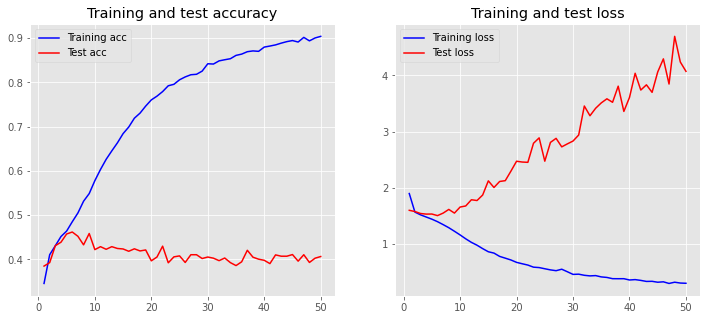

In [16]:
m2 = model2.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=50,batch_size=16)

plot_history(m2)

We revert back to the bigger network and add a few regularizers, both dropout and activity regularizer

In [19]:
from keras.regularizers import l2


model4 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,1), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)),
        tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'),
        
        tf.keras.layers.Conv2D(32, (3,1), activation='relu',activity_regularizer=l2(0.001)),
        tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'),
        tf.keras.layers.Dropout(0.1),

        tf.keras.layers.Conv2D(32, (2,1), activation='relu',activity_regularizer=l2(0.001)),
        tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'),
        tf.keras.layers.Dropout(0.1),
    
        tf.keras.layers.Conv2D(32, (2,1), activation='relu',activity_regularizer=l2(0.001)),
        tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'),
        tf.keras.layers.Dropout(0.1),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

model4.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 248, 15, 64)       256       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 124, 15, 64)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 122, 15, 32)       6176      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 61, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 61, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 15, 32)       

Epoch 1/50
673/673 [==============================] - 75s 110ms/step - loss: 9.9856 - accuracy: 0.2785 - val_loss: 1.6893 - val_accuracy: 0.3766
Epoch 2/50
673/673 [==============================] - 76s 113ms/step - loss: 1.6216 - accuracy: 0.3999 - val_loss: 1.5634 - val_accuracy: 0.4275
Epoch 3/50
673/673 [==============================] - 74s 110ms/step - loss: 1.5549 - accuracy: 0.4347 - val_loss: 1.5143 - val_accuracy: 0.4639
Epoch 4/50
673/673 [==============================] - 74s 110ms/step - loss: 1.5024 - accuracy: 0.4634 - val_loss: 1.4940 - val_accuracy: 0.4632
Epoch 5/50
673/673 [==============================] - 75s 111ms/step - loss: 1.4620 - accuracy: 0.4813 - val_loss: 1.5098 - val_accuracy: 0.4454
Epoch 6/50
673/673 [==============================] - 75s 112ms/step - loss: 1.4333 - accuracy: 0.4908 - val_loss: 1.5212 - val_accuracy: 0.4517
Epoch 7/50
673/673 [==============================] - 76s 112ms/step - loss: 1.3920 - accuracy: 0.5103 - val_loss: 1.4845 - val_ac

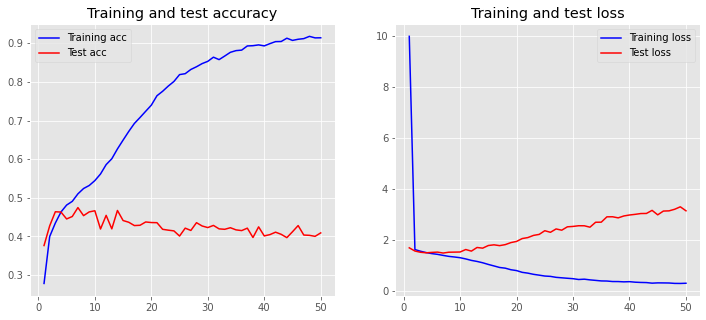

In [20]:
m4 = model4.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=50,batch_size=32)

plot_history(m4)

For this model, we change the regularization as well as see if how changing the window shape will affect the model.

In [21]:
from keras.regularizers import l2


model5 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,1), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)),
        tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'),
        
        tf.keras.layers.Conv2D(32, (3,1), activation='relu',activity_regularizer=l2(0.01)),
        tf.keras.layers.MaxPooling2D((3,1), strides=(2,1), padding='same'),
        tf.keras.layers.Dropout(0.1),
    
        tf.keras.layers.Conv2D(32, (3,1), activation='relu',activity_regularizer=l2(0.01)),
        tf.keras.layers.MaxPooling2D((2,1), strides=(1,1), padding='same'),
        tf.keras.layers.Dropout(0.1),
    
        tf.keras.layers.Conv2D(32, (2,1), activation='relu',activity_regularizer=l2(0.01)),
        tf.keras.layers.MaxPooling2D((2,1), strides=(1,1), padding='same'),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu',activity_regularizer=l2(0.001)), 
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(32, activation='relu',activity_regularizer=l2(0.001)),
        tf.keras.layers.Dense(16, activation='relu',activity_regularizer=l2(0.001)),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

model5.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 248, 15, 64)       256       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 124, 15, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 15, 32)       6176      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 61, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 61, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 59, 15, 32)       

Epoch 1/50
673/673 [==============================] - 88s 130ms/step - loss: 225.8764 - accuracy: 0.1745 - val_loss: 2.1846 - val_accuracy: 0.1892
Epoch 2/50
673/673 [==============================] - 89s 132ms/step - loss: 2.0781 - accuracy: 0.2086 - val_loss: 1.9500 - val_accuracy: 0.2472
Epoch 3/50
673/673 [==============================] - 88s 131ms/step - loss: 1.9161 - accuracy: 0.2527 - val_loss: 1.8645 - val_accuracy: 0.2625
Epoch 4/50
673/673 [==============================] - 89s 132ms/step - loss: 1.8381 - accuracy: 0.2737 - val_loss: 1.8181 - val_accuracy: 0.2725
Epoch 5/50
673/673 [==============================] - 89s 132ms/step - loss: 1.8006 - accuracy: 0.2890 - val_loss: 1.7906 - val_accuracy: 0.2985
Epoch 6/50
673/673 [==============================] - 89s 132ms/step - loss: 1.7660 - accuracy: 0.3159 - val_loss: 1.7738 - val_accuracy: 0.3230
Epoch 7/50
673/673 [==============================] - 89s 132ms/step - loss: 1.7298 - accuracy: 0.3362 - val_loss: 1.7842 - val_

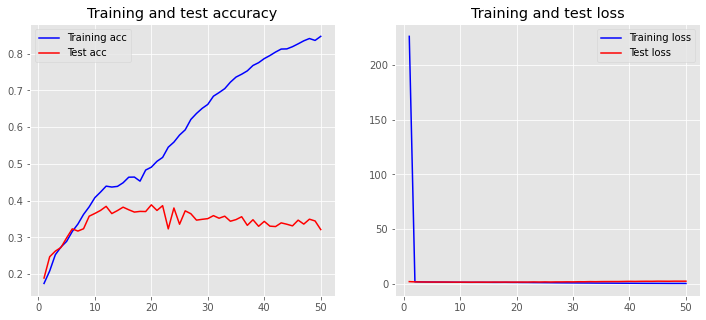

In [22]:
m5 = model5.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=50,batch_size=32)

plot_history(m5)

Medium model with minimal regularization.

In [16]:
from keras.regularizers import l2


model6 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        
        tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(7, activation='softmax')
    ])

model6.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 13, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 7, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 5, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 3, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 2, 32)         4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 1, 32)        0

Epoch 1/50
673/673 [==============================] - 25s 36ms/step - loss: 1.6257 - accuracy: 0.4084 - val_loss: 1.5554 - val_accuracy: 0.4613
Epoch 2/50
673/673 [==============================] - 25s 38ms/step - loss: 1.4297 - accuracy: 0.4746 - val_loss: 1.7099 - val_accuracy: 0.3896
Epoch 3/50
673/673 [==============================] - 26s 39ms/step - loss: 1.3540 - accuracy: 0.5016 - val_loss: 1.5903 - val_accuracy: 0.4643
Epoch 4/50
673/673 [==============================] - 27s 40ms/step - loss: 1.3070 - accuracy: 0.5267 - val_loss: 1.3868 - val_accuracy: 0.4955
Epoch 5/50
673/673 [==============================] - 27s 40ms/step - loss: 1.2575 - accuracy: 0.5470 - val_loss: 1.5547 - val_accuracy: 0.4182
Epoch 6/50
673/673 [==============================] - 27s 40ms/step - loss: 1.2312 - accuracy: 0.5561 - val_loss: 1.6456 - val_accuracy: 0.4862
Epoch 7/50
673/673 [==============================] - 27s 39ms/step - loss: 1.1950 - accuracy: 0.5704 - val_loss: 1.3923 - val_accuracy:

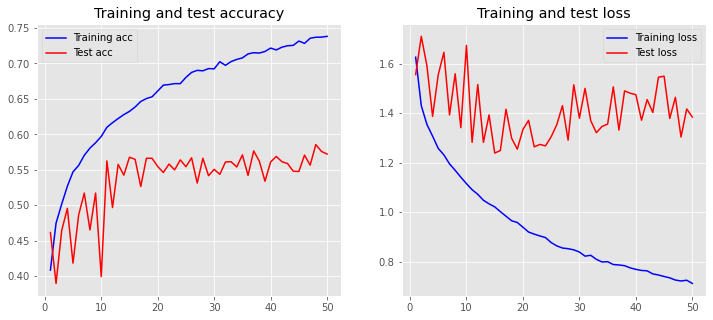

In [17]:
m6 = model6.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=50,batch_size=32)
model6.save('bestCNNNoTHEME')

plot_history(m6)

Final validation - Model 6 seems to provide the best results.


In [18]:


model6.evaluate(x=x_valid,y= y_valid)


85/85 [==============================] - 1s 9ms/step - loss: 1.4237 - accuracy: 0.5606


[1.4236867427825928, 0.5605947971343994]